# Testing time marching in package `Whirl`

In [1]:
include(joinpath(Pkg.dir("Dyn3d"), "src/Dyn3d.jl"))
using Dyn3d
include(joinpath(Pkg.dir("Whirl"), "src/Whirl.jl"))
using Whirl

In [2]:
using Plots
pyplot()
clibrary(:colorbrewer)
default(grid = false)

### Purely 2-d diffusion from a circle, which is constrained system with integrating factor

In [3]:
nx = 129; ny = 129;
Lx = 2.0;
dx = Lx/(nx-2);
w = Nodes(Dual,(nx,ny));

In [4]:
n = 128;
θ = linspace(0,2π,n+1);
R = 0.5;
xb = 1.0 + R*cos.(θ[1:n])
yb = 1.0 + R*sin.(θ[1:n])
ds = (2π/n)*R;
X = VectorData(xb,yb);
f = ScalarData(X);

In [5]:
E = Regularize(X,dx;ddftype=Fields.Roma,issymmetric=true)
Hmat, Emat = RegularizationMatrix(E,f,w);

In [6]:
plan_constraints(u::Nodes{Dual,nx,ny},t::Float64) = Hmat, Emat

plan_constraints (generic function with 1 method)

In [7]:
Whirl.TimeMarching.r₁(w::Nodes{T,NX,NY},t::Float64) where {T,NX,NY} = Nodes(T,w)
Whirl.TimeMarching.r₂(w::Nodes{T,NX,NY},t::Float64) where {T,NX,NY} = ScalarData(ones(length(f)))

In [8]:
Δt = 1.0
ifherk = IFHERK(w,f,Δt,plan_intfact,plan_constraints,(r₁,r₂),rk=RK31)

Order-3+ IF-HERK integrator with
   State of type Whirl.Fields.Nodes{Whirl.Fields.Dual,129,129}
   Force of type Whirl.Fields.ScalarData{128}
   Time step size 1.0


In [9]:
@time ifherk.S[1].B₂A⁻¹(w)
@time ifherk.S[1].S*f;
@time ifherk.S[1].A⁻¹B₁ᵀ(f);

  0.033132 seconds (413 allocations: 184.699 KiB)
  0.009020 seconds (31 allocations: 320.047 KiB)
  0.019984 seconds (774 allocations: 331.925 KiB)


In [10]:
@time ifherk(0.0,w)

  3.296857 seconds (388.37 k allocations: 157.467 MiB, 0.73% gc time)


(1.0, Whirl.Fields.Dual nodes in a (nx = 129, ny = 129) cell grid
  Number of Whirl.Fields.Dual nodes: (nx = 129, ny = 129), 128 points of scalar-valued data
)

In [11]:
t = 0.0
w = Nodes(Dual,(nx,ny));

In [12]:
@time for i = 1:20
    t,w,f = ifherk(t,w);
end

 47.500428 seconds (286.38 k allocations: 2.769 GiB, 0.48% gc time)


In [13]:
w.data[65,30:40]

11-element Array{Float64,1}:
 0.65121 
 0.771145
 0.888233
 1.02152 
 0.981102
 0.877992
 0.777163
 0.670255
 0.567734
 0.472608
 0.386445

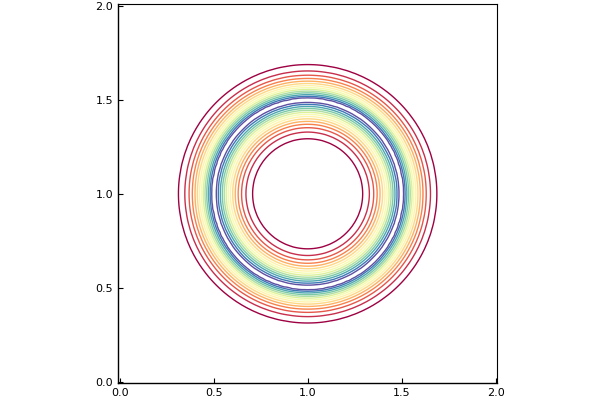

/home/julia/JuliaPro-0.6.2.2/JuliaPro/pkgs-0.6.2.2/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


In [14]:
xg, yg = coordinates(w,dx=dx)
plot(xg,yg,w)

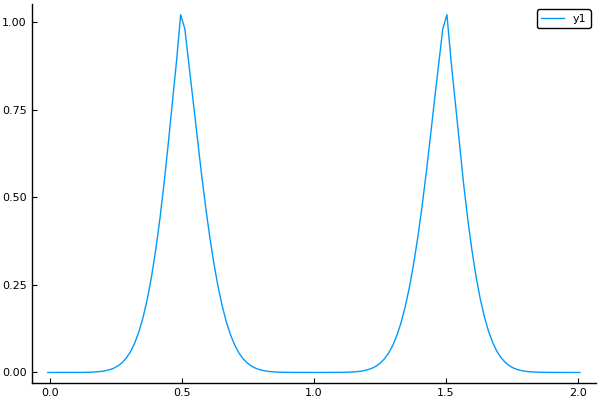

In [15]:
plot(xg,w[65,:])

### 2-d diffusion from a circle with heat source

In [16]:
nx = 129; ny = 129;
Lx = 2.0;
dx = Lx/(nx-2);
w = Nodes(Dual,(nx,ny));

In [17]:
n = 128;
θ = linspace(0,2π,n+1);
R = 0.5;
xb = 1.0 + R*cos.(θ[1:n])
yb = 1.0 + R*sin.(θ[1:n])
ds = (2π/n)*R;
X = VectorData(xb,yb);
f = ScalarData(X);

In [18]:
E = Regularize(X,dx;ddftype=Fields.Roma,issymmetric=true)
Hmat, Emat = RegularizationMatrix(E,f,w);

In [19]:
plan_constraints(u::Nodes{Dual,nx,ny},t::Float64) = Hmat, Emat

plan_constraints (generic function with 1 method)

In [20]:
Whirl.TimeMarching.r₁(w::Nodes{T,NX,NY},t::Float64) where {T,NX,NY} = Nodes(T,w)
Whirl.TimeMarching.r₂(w::Nodes{T,NX,NY},t::Float64) where {T,NX,NY} = ScalarData(ones(length(f)))

In [21]:
Δt = 1.0
ifherk = IFHERK(w,f,Δt,plan_intfact,plan_constraints,(r₁,r₂),rk=RK31)

Order-3+ IF-HERK integrator with
   State of type Whirl.Fields.Nodes{Whirl.Fields.Dual,129,129}
   Force of type Whirl.Fields.ScalarData{128}
   Time step size 1.0


In [22]:
@time ifherk(0.0,w)

  2.848756 seconds (139.15 k allocations: 146.179 MiB, 0.75% gc time)


(1.0, Whirl.Fields.Dual nodes in a (nx = 129, ny = 129) cell grid
  Number of Whirl.Fields.Dual nodes: (nx = 129, ny = 129), 128 points of scalar-valued data
)

In [23]:
t = 0.0
w = Nodes(Dual,(nx,ny));
w.data[[65,66,65,66],[40,40,90,90]] .= 2.0; 

In [24]:
@time for i = 1:20
    t,w,f = ifherk(t,w);
    w.data[[65,66,65,66],[40,40,90,90]] .= 2.0; 
end

 47.654873 seconds (286.48 k allocations: 2.769 GiB, 0.63% gc time)


In [25]:
w.data[65,30:40]

11-element Array{Float64,1}:
 0.641817
 0.759402
 0.876606
 1.006   
 1.01427 
 0.982001
 0.960433
 0.952001
 0.972851
 1.01588 
 2.0     

In [26]:
w.data[65,60:70]

11-element Array{Float64,1}:
 0.000517018
 0.000299443
 0.000173582
 0.000103817
 6.91729e-5 
 5.87467e-5 
 6.91729e-5 
 0.000103817
 0.000173582
 0.000299443
 0.000517018

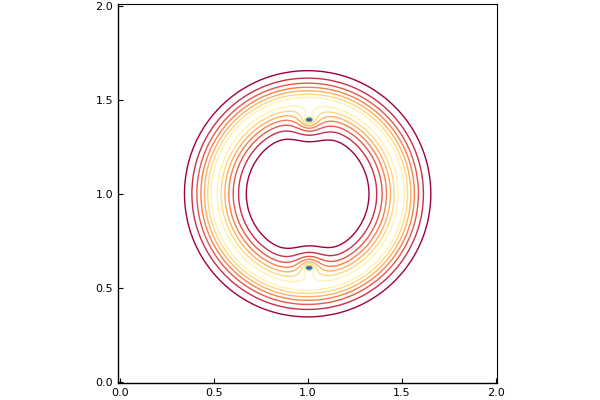

In [27]:
xg, yg = coordinates(w,dx=dx)
plot(xg,yg,w)

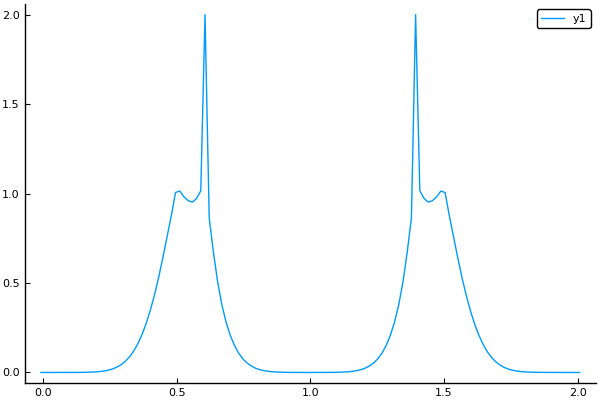

In [28]:
plot(xg,w[65,:])